Visulization of dataset

In [3]:
from datasets import UADETRAC, MOT20
from visualization.utils import plot_inputs_as_video, ImageConvert
import matplotlib.pyplot as plt

- Load Dataset

In [5]:
# dataset = UADETRAC(color_jitter_aug=True, rand_crop_aug=True)
dataset = MOT20(color_jitter_aug=False, rand_crop_aug=True)

reading: data\MOT20\train\MOT20-05: 100%|██████████| 4/4 [00:28<00:00,  7.20s/it]


- Plot dataset image

In [6]:
def plot_video(video):
    fig, axs = plt.subplots(ncols=len(video), nrows=1, figsize=(22, 7))
    for img, ax in zip(video, axs):
        ax.imshow(ImageConvert.to_mat_image(img))
    plt.show()

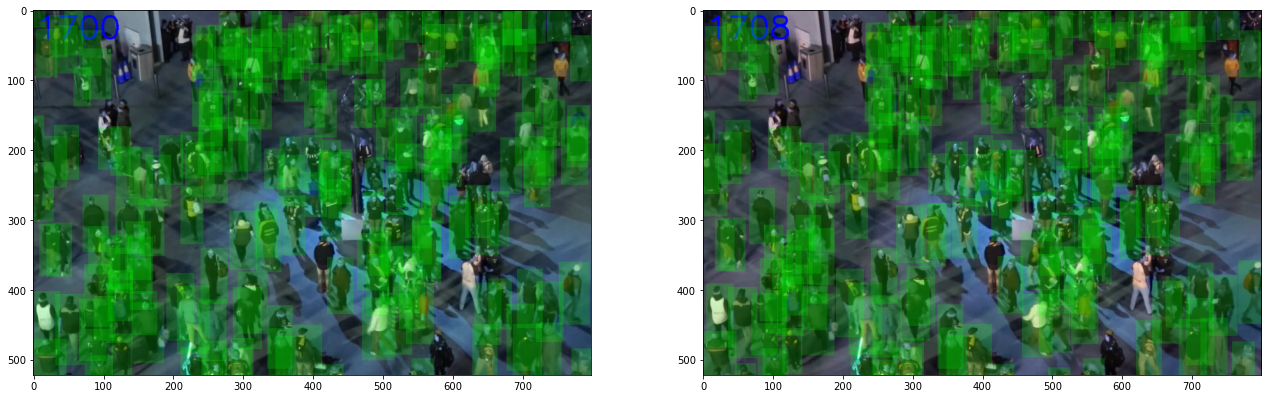

torch.Size([2, 3, 522, 799])


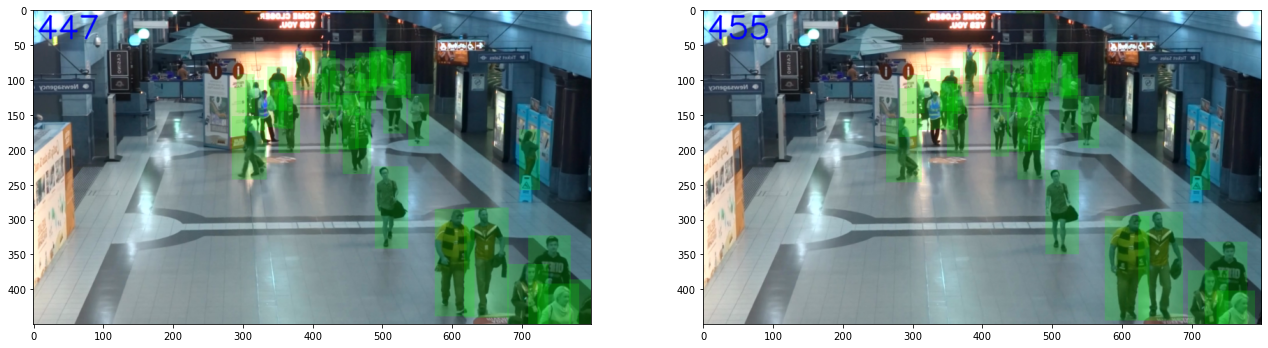

torch.Size([2, 3, 450, 800])


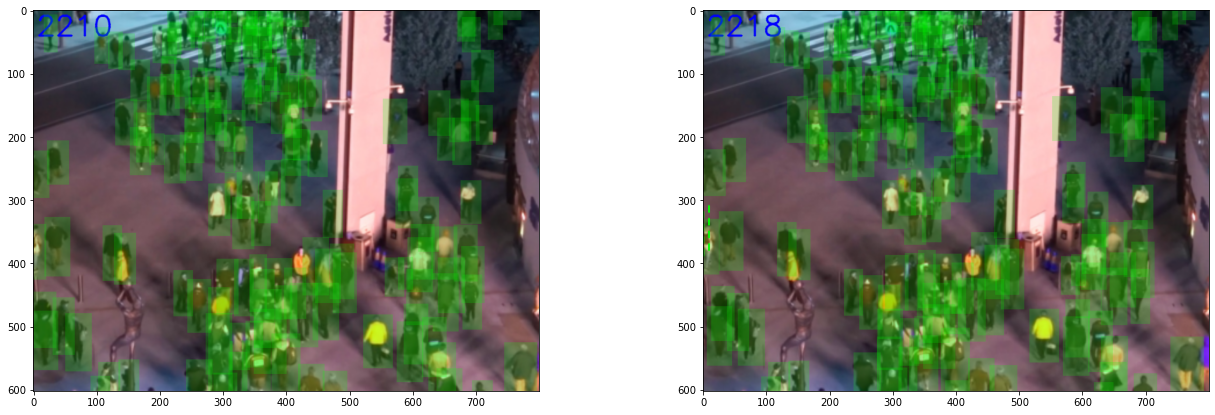

torch.Size([2, 3, 602, 800])


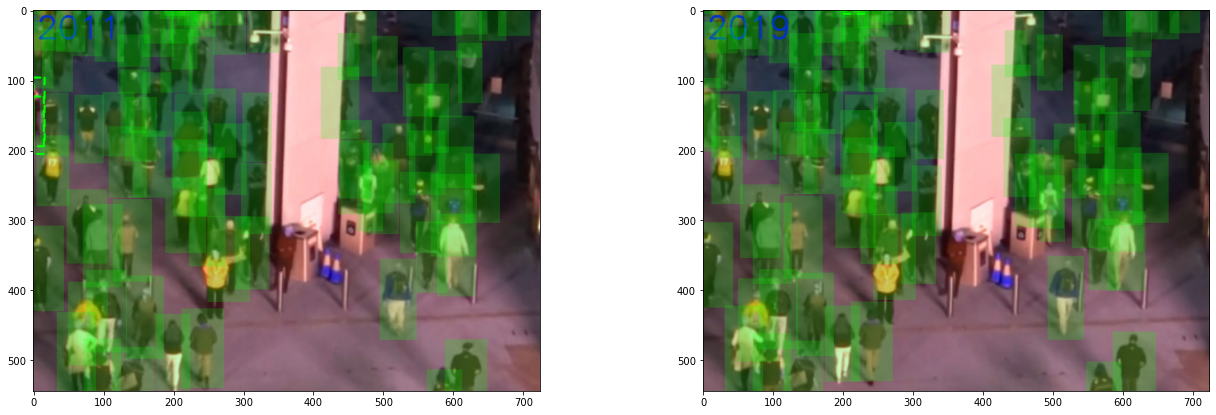

torch.Size([2, 3, 544, 724])


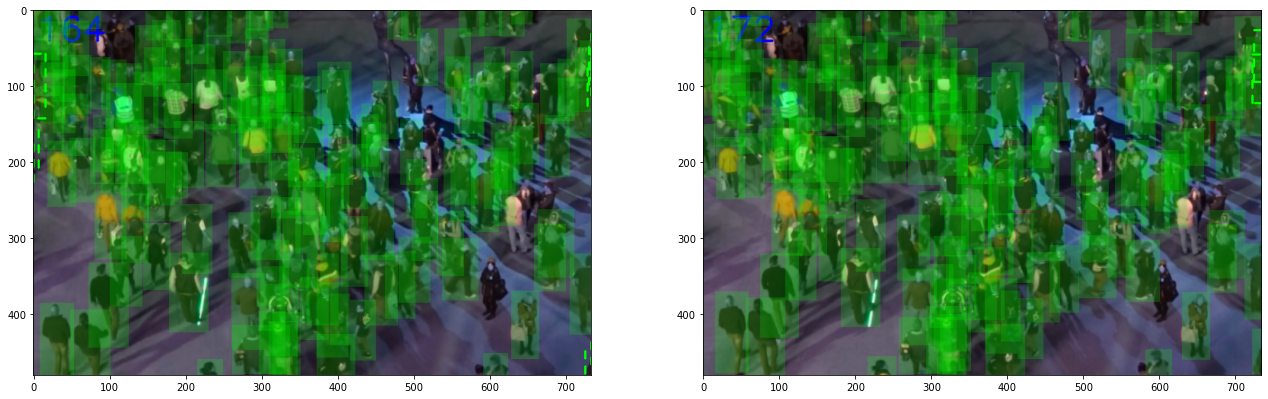

torch.Size([2, 3, 480, 734])


In [7]:
import torch
import numpy as np
from utils.box_ops import box_xyxy_to_cxcywh, box_cxcywh_to_xyxy
from utils.track_ops import area, wh_ratio

np.random.seed(42)
skip = 4


for i in np.random.choice(min(len(dataset), 10000), 5):
    imgs, targets = dataset[i]
    video = plot_inputs_as_video(imgs.transpose(0, 1).unsqueeze(0), [targets['boxes']], [targets['frame_indexes']], [targets['referred']])
    video = video[0][::skip]
    plot_video(video)
    print(video.shape)
    # _, _, _, h, w,  = video.shape
    # boxes = box_cxcywh_to_xyxy(targets['boxes']) * torch.tensor([w, h, w, h], dtype=torch.float32)
    # print(targets['referred'], area(boxes), wh_ratio(boxes), sep='\n')